# Forecast

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [156]:
import sys
sys.path.append("..")

# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import itertools
import pickle

import m5.config as cfg
import m5.preprocessing
from m5.model import train, predict, compile_fcst
from m5.evaluate import accuracy, accuracy_all_levels, collect_metrics
from m5.plot import plot_fcst

# Library settings
pd.options.display.max_columns = 999
plt.rcParams["figure.figsize"] = (16, 4)

## Preprocessing

In [3]:
m5.preprocessing.unzip_data(cfg.DATA_DIR)

In [4]:
m5.preprocessing.prepare_base_data(cfg.DATA_DIR, task=cfg.TASK)

In [196]:
m5.preprocessing.prepare_agg_levels(cfg.DATA_DIR)

Preparing agg level 12
Preparing agg level 11 
Done.


In [100]:
m5.preprocessing.prepare_store_data(cfg.DATA_DIR)

Preparing store data 9
Done.


## Main

In [5]:
data = pd.read_parquet(cfg.DATA_DIR / "processed/stores/0/data.parquet",)

In [8]:
data

,item_id,store_id,d,sales,dollar_sales,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,0,0,1,3,6.00,1,1,2011,0,0,0,0,0,0,0
1,0,0,2,0,0.00,2,1,2011,0,0,0,0,0,0,0
2,0,0,3,0,0.00,3,1,2011,0,0,0,0,0,0,0
3,0,0,4,1,2.00,4,2,2011,0,0,0,0,1,1,0
4,0,0,5,4,8.00,5,2,2011,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45925357,3048,0,1909,0,0.00,5,4,2016,0,0,0,0,0,0,0
45925358,3048,0,1910,1,5.94,6,4,2016,0,0,0,0,0,0,0
45925359,3048,0,1911,1,5.94,7,4,2016,0,0,0,0,0,0,0
45925360,3048,0,1912,0,0.00,1,4,2016,0,0,0,0,0,0,0


In [16]:
train = data.groupby(["item_id", "store_id"], group_keys=False).apply(lambda df: df.iloc[:-28])

In [ ]:
def naive_fit()

In [30]:
train

,item_id,store_id,d,sales,dollar_sales,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,0,0,1,3,6.00,1,1,2011,0,0,0,0,0,0,0
1,0,0,2,0,0.00,2,1,2011,0,0,0,0,0,0,0
2,0,0,3,0,0.00,3,1,2011,0,0,0,0,0,0,0
3,0,0,4,1,2.00,4,2,2011,0,0,0,0,1,1,0
4,0,0,5,4,8.00,5,2,2011,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45925329,3048,0,1881,1,5.94,5,3,2016,0,0,0,0,0,0,0
45925330,3048,0,1882,0,0.00,6,3,2016,7,4,0,0,0,0,0
45925331,3048,0,1883,0,0.00,7,3,2016,0,0,0,0,0,0,0
45925332,3048,0,1884,0,0.00,1,3,2016,0,0,0,0,0,0,0


In [23]:
item = 0

In [27]:
train.loc[train.item_id == item, ["item_id", "store_id", "d", "sales"]].tail(1)

,item_id,store_id,d,sales
1884,0,0,1885,0


In [66]:
def naive(data_dir, model_dir):
    models_d = dict()
    for item in train.item_id.unique():
        tail = train.loc[train.item_id == item, ["item_id", "store_id", "d", "sales"]].tail(1)
        key = tuple(tail.iloc[0, :2])
        last = tail.iloc[0, 3]
        models_d[key] = last
    m

In [114]:
from m5.definitions import AGG_LEVEL

In [166]:
def train_level(data_dir, model_dir, level):
    output_dir = model_dir / "naive"
    if not output_dir.exists():
        output_dir.mkdir(parents=True)
    models_d = dict()
    for store in range(0, 10):
        train_data = pd.read_parquet(data_dir / f"processed/stores/{store}/train.parquet")
        for item in train_data.item_id.unique():
            print(f"Training model for item {item} and store {store}   ", end="\r")
            tail = train_data.loc[train_data.item_id == item, AGG_LEVEL[level] + ["sales"]].tail(1)
            key = tuple(tail.iloc[0, :2])
            last = tail.iloc[0, 3]
            models_d[(item, store)] = last
    file =  output_dir / "model.pkl"
    with open(file, "wb") as f:
        pickle.dump(models_d, f)
    print("\nDone.")

In [167]:
def predict_level(data_dir, model_dir, fcst_dir, level, fh=28):
    output_dir = fcst_dir / f"naive/{level}"
    if not output_dir.exists():
        output_dir.mkdir(parents=True)
    model_file = open(cfg.MODEL_DIR / "naive/model.pkl", "rb")
    models_d = pickle.load(model_file)
    model_file.close()
    fcst_l = []
    for store in range(0, 10):
        val = pd.read_parquet(data_dir / f"processed/stores/{store}/val.parquet")
        for item in val.item_id.unique():
            print(f"Making predictions for item {item} and store {store}   ", end="\r")
            fcst = val.loc[val.item_id == item, AGG_LEVEL[level] + ["sales"]].copy()
            fcst["fcst"] = list(itertools.repeat(models_d[(item, store)], fh))
            fcst_l.append(fcst)
    fcst_df = pd.concat(fcst_l)
    fcst_df.to_parquet(output_dir / "fcst.parquet")
    print("\nDone.")

In [229]:
def bottom_up(data_dir, fcst_dir, model):
    id_cols = pd.read_parquet(data_dir / "processed/id-cols.parquet")
    base_fcst = pd.read_parquet(fcst_dir / f"{model}/12/fcst.parquet")
    base_fcst = base_fcst.drop(columns=["item_id", "store_id"])
    base_fcst = id_cols.join(base_fcst, how="right")
    for level in range(1, 12):
        print(f"Making predictions for level {level}   ", end="\r")
        output_dir = fcst_dir / f"{model}/{level}"
        if not output_dir.exists():
            output_dir.mkdir(parents=True)
        fcst = base_fcst.groupby(AGG_LEVEL[level])[["sales", "fcst"]].sum().reset_index()
        fcst.to_parquet(output_dir / "fcst.parquet")
    print("\nDone.")

In [230]:
bottom_up(cfg.DATA_DIR, cfg.FCST_DIR, model="naive")

Making predictions for level 11   
Done.


In [331]:
accuracy_all_levels(cfg.DATA_DIR, cfg.FCST_DIR, cfg.METRICS_DIR, cfg.FH, model="naive")

Calculating accuracy for level 1
Calculating accuracy for level 2
Calculating accuracy for level 3
Calculating accuracy for level 4
Calculating accuracy for level 5
Calculating accuracy for level 6
Calculating accuracy for level 7
Calculating accuracy for level 8
Calculating accuracy for level 9
Calculating accuracy for level 10
Calculating accuracy for level 11
Calculating accuracy for level 12


In [ ]:
pd.read_csv()

In [344]:
pd.read_csv(cfg.METRICS_DIR / "naive/7/accuracy.csv" )["wrmsse"].sum()

1.6358783297263704

In [265]:
fcst = pd.read_parquet(cfg.FCST_DIR / "naive/3/fcst.parquet")

In [326]:
data = pd.read_parquet(cfg.DATA_DIR / "processed/levels/3/data.parquet")

In [273]:
data = data.loc[data.d <= data.d.max() - 28, AGG_LEVEL[3][:-1] + ["d", "sales", "dollar_sales"]]

In [275]:
total_dollar_sales = data.loc[data.d > data.d.max() - 28, "dollar_sales"].sum()

In [277]:
fh = 28

In [279]:
agg_level = AGG_LEVEL[3][:-1]

In [282]:
weights = data.loc[data.d > data.d.max() - fh, :].groupby(agg_level)["dollar_sales"].agg(
        lambda x: x.sum() / total_dollar_sales).reset_index()
weights = weights.rename(columns={"dollar_sales": "weights"})

In [284]:
mse_naive_insample = data.groupby(agg_level)["sales"].agg(lambda x: (x.diff()**2).mean()).reset_index()
mse_naive_insample = mse_naive_insample.rename(columns={"sales": "mse_naive_insample"})

In [285]:
mse_naive_insample

,store_id,mse_naive_insample
0,0,750171.495754
1,1,563669.303609
2,2,921369.304140
3,3,100483.197452
4,4,356746.298832
5,5,583479.563163
6,6,327078.698514
7,7,509842.136943
8,8,512924.965499
9,9,506963.504777


In [327]:
mse_fcst = fcst.groupby(agg_level).apply(lambda df: ((df["sales"] - df["fcst"])**2).mean()).reset_index()
mse_fcst = mse_fcst.rename(columns={0: "mse_fcst"})

In [288]:
agg_level

['store_id']

In [319]:
fcst = fcst.astype("int64")

In [320]:
fcst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   store_id  280 non-null    int64
 1   d         280 non-null    int64
 2   sales     280 non-null    int64
 3   fcst      280 non-null    int64
dtypes: int64(4)
memory usage: 8.9 KB


In [321]:
fcst.groupby(agg_level).apply(lambda df: ((df["sales"] - df["fcst"])**2).mean())

store_id
0    9.343780e+05
1    4.485413e+06
2    2.878504e+06
3    9.593325e+04
4    1.876989e+06
5    1.047398e+06
6    2.586844e+05
7    9.228289e+05
8    2.689437e+06
9    5.941085e+05
dtype: float64

In [295]:
df = fcst.loc[fcst.store_id == 0, ["sales", "fcst"]]

In [302]:
diff = (df["sales"] - df["fcst"])

In [328]:
mse_fcst = fcst.groupby(agg_level).apply(lambda df: ((df["sales"] - df["fcst"])**2).mean()).reset_index()
mse_fcst = mse_fcst.rename(columns={0: "mse_fcst"})

accuracy_df = pd.merge(mse_fcst, mse_naive_insample, on=agg_level)
accuracy_df = accuracy_df.merge(weights, on=agg_level)
accuracy_df["msse"] = accuracy_df["mse_fcst"] / accuracy_df["mse_naive_insample"]
accuracy_df["rmsse"] = np.sqrt(accuracy_df["msse"])
accuracy_df["wrmsse"] = accuracy_df["rmsse"] * accuracy_df["weights"]

In [329]:
accuracy_df["wrmsse"].sum()

1.6322457718250543

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sales   28 non-null     int16
 1   fcst    28 non-null     int16
dtypes: int16(2)
memory usage: 336.0 bytes


In [305]:
diff*diff

0     -6128
1    -10271
2      -572
3     23969
4    -32476
5     17472
6     -4407
7     20449
8    -25980
9    -27263
10   -20380
11     2500
12   -14903
13   -13936
14   -31311
15     8452
16   -23311
17    16448
18    13217
19        0
20    12825
21   -26096
22   -19056
23   -20695
24     4096
25    13988
26   -27504
27   -12016
dtype: int16

In [287]:
mse_fcst

,store_id,mse_fcst
0,0,-6531.750000
1,1,3218.892857
2,2,-398.642857
3,3,2310.392857
4,4,4531.714286
5,5,3503.285714
6,6,3562.142857
7,7,-1696.821429
8,8,-2219.714286
9,9,-2737.214286


In [283]:
weights

,store_id,weights
0,0,0.109100
1,1,0.102343
2,2,0.157984
3,3,0.064323
4,4,0.079185
5,5,0.101254
6,6,0.098930
7,7,0.085972
8,8,0.117008
9,9,0.083900


In [274]:
data

,store_id,d,sales,dollar_sales
0,0,1,4337,10933.160156
1,1,1,3494,9101.519531
2,2,1,4739,11679.830078
3,3,1,1625,4561.589844
4,4,1,2556,6586.680176
...,...,...,...,...
18845,5,1885,4759,14831.990234
18846,6,1885,3988,12554.469727
18847,7,1885,3550,10633.299805
18848,8,1885,4127,10843.269531


In [268]:
fcst

,store_id,d,sales,fcst
0,0,1886,3905,4669
1,0,1887,3788,4669
2,0,1888,3339,4669
3,0,1889,4076,4669
4,0,1890,4983,4669
...,...,...,...,...
275,9,1909,3159,4051
276,9,1910,3226,4051
277,9,1911,3828,4051
278,9,1912,4686,4051


<AxesSubplot:xlabel='d'>

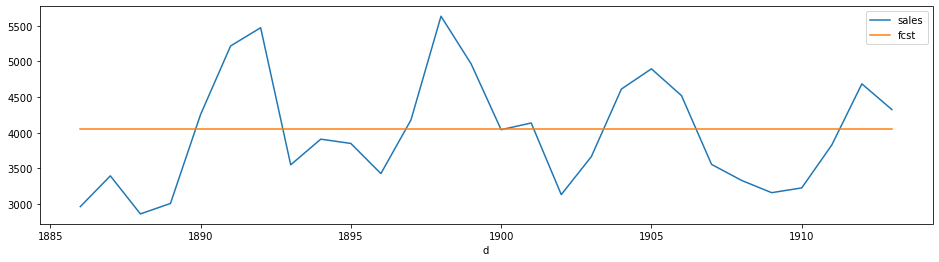

In [254]:
fcst.set_index(["store_id", "d"]).loc[9].plot()

<AxesSubplot:xlabel='d'>

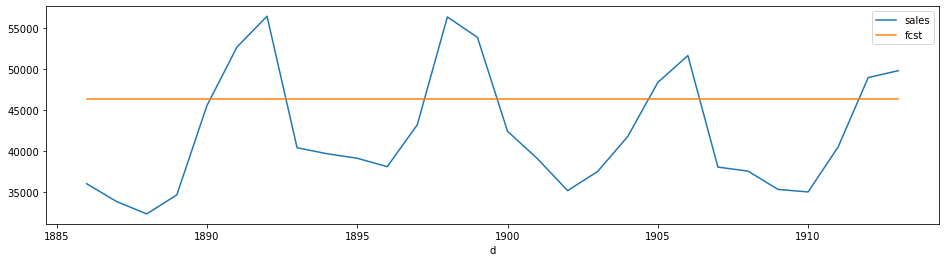

In [234]:
fcst.set_index("d").plot()

In [189]:
data = pd.read_parquet(cfg.DATA_DIR / "processed/base-numeric.parquet")

In [195]:
data.iloc[:, :6]

,id,item_id,dept_id,cat_id,store_id,state_id
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
45942495,30489,3048,6,2,9,2
45942496,30489,3048,6,2,9,2
45942497,30489,3048,6,2,9,2
45942498,30489,3048,6,2,9,2


In [228]:
fcst.iloc[:, 2:]

,cat_id,store_id,state_id,d,sales,fcst
1885,0,0,0,1886,2,0
1886,0,0,0,1887,1,0
1887,0,0,0,1888,1,0
1888,0,0,0,1889,0,0
1889,0,0,0,1890,4,0
...,...,...,...,...,...,...
45942495,2,9,2,1909,0,0
45942496,2,9,2,1910,0,0
45942497,2,9,2,1911,0,0
45942498,2,9,2,1912,0,0


In [199]:
id_cols = pd.read_parquet(cfg.DATA_DIR / "processed/id-cols.parquet")

In [218]:
fcst = id_cols.join(fcst.drop(columns=["item_id", "store_id"]), how="right")

In [219]:
AGG_LEVEL

{1: ['d'],
 2: ['state_id', 'd'],
 3: ['store_id', 'd'],
 4: ['cat_id', 'd'],
 5: ['dept_id', 'd'],
 6: ['state_id', 'cat_id', 'd'],
 7: ['state_id', 'dept_id', 'd'],
 8: ['store_id', 'cat_id', 'd'],
 9: ['store_id', 'dept_id', 'd'],
 10: ['item_id', 'd'],
 11: ['item_id', 'state_id', 'd'],
 12: ['item_id', 'store_id', 'd']}

<AxesSubplot:xlabel='d'>

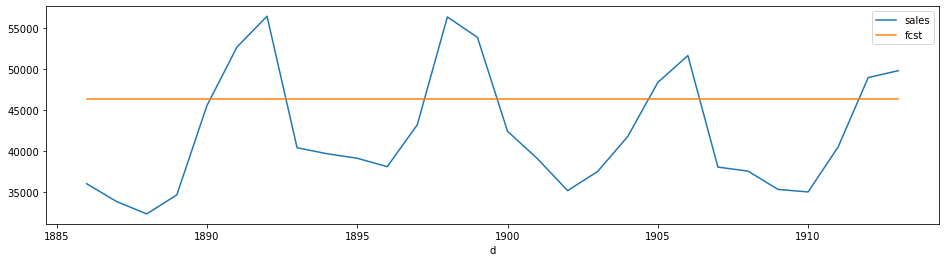

In [225]:
fcst.groupby(AGG_LEVEL[12])[["sales", "fcst"]].sum().reset_index().set_index("d").plot()

In [213]:
fcst.join(id_cols, rsuffix="_")

,item_id,store_id,d,sales,fcst,item_id_,dept_id,cat_id,store_id_,state_id
1885,0,0,1886,2,0,0,0,0,0,0
1886,0,0,1887,1,0,0,0,0,0,0
1887,0,0,1888,1,0,0,0,0,0,0
1888,0,0,1889,0,0,0,0,0,0,0
1889,0,0,1890,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
45942495,3048,9,1909,0,0,3048,6,2,9,2
45942496,3048,9,1910,0,0,3048,6,2,9,2
45942497,3048,9,1911,0,0,3048,6,2,9,2
45942498,3048,9,1912,0,0,3048,6,2,9,2


In [208]:
fcst.merge(id_cols, how="left", on=["item_id", "store_id"])

MemoryError: Unable to allocate 9.58 GiB for an array with shape (1286390000,) and data type int64

In [206]:
data

,item_id,store_id,d,sales,dollar_sales,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,0,0,1,3,6.0,1,1,2011,0,0,0,0,0,0,0
1,0,0,2,0,0.0,2,1,2011,0,0,0,0,0,0,0
2,0,0,3,0,0.0,3,1,2011,0,0,0,0,0,0,0
3,0,0,4,1,2.0,4,2,2011,0,0,0,0,1,1,0
4,0,0,5,4,8.0,5,2,2011,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45942495,3048,9,1909,0,0.0,5,4,2016,0,0,0,0,0,0,0
45942496,3048,9,1910,0,0.0,6,4,2016,0,0,0,0,0,0,0
45942497,3048,9,1911,0,0.0,7,4,2016,0,0,0,0,0,0,0
45942498,3048,9,1912,0,0.0,1,4,2016,0,0,0,0,0,0,0


In [205]:
data.join(id_cols, how="left")

ValueError: columns overlap but no suffix specified: Index(['item_id', 'store_id'], dtype='object')

In [173]:
fcst = pd.read_parquet(cfg.FCST_DIR / "naive/12/fcst.parquet")

In [174]:
fcst.groupby()

,item_id,store_id,d,sales,fcst
1885,0,0,1886,2,0
1886,0,0,1887,1,0
1887,0,0,1888,1,0
1888,0,0,1889,0,0
1889,0,0,1890,4,0
...,...,...,...,...,...
45942495,3048,9,1909,0,0
45942496,3048,9,1910,0,0
45942497,3048,9,1911,0,0
45942498,3048,9,1912,0,0


In [145]:
train(cfg.DATA_DIR, cfg.MODEL_DIR, level=12)

Training model for item 3048 and store 9   
Done.


In [168]:
predict(cfg.DATA_DIR, cfg.MODEL_DIR, cfg.FCST_DIR, level=12)

Making predictions for item 3048 and store 9   
Done.


In [169]:
acc = accuracy(cfg.DATA_DIR, cfg.FCST_DIR, cfg.METRICS_DIR, cfg.FH, level=12, model="naive")

Calculating accuracy for level 12


In [171]:
acc["wrmsse"].sum()

1.1751771270400968

In [ ]:
accuracy_all_levels

In [147]:
fcst = pd.read_parquet(cfg.FCST_DIR / "naive/fcst.parquet")

<AxesSubplot:>

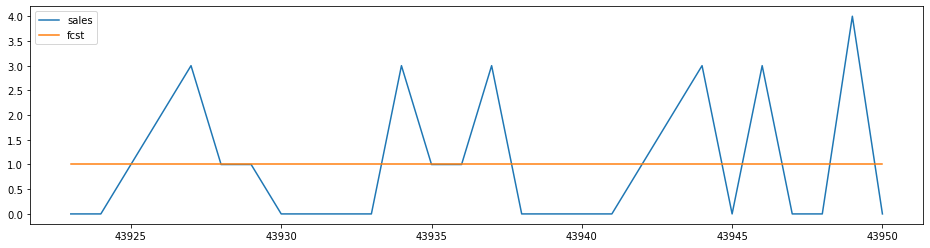

In [155]:
fcst.loc[(fcst.item_id == 2) & (fcst.store_id == 2), ["sales", "fcst"]].plot()

In [135]:
28*3049

85372

In [127]:
pd.concat(fcst_l)

,item_id,store_id,d,sales,fcst
1885,0,0,1886,2,0
1886,0,0,1887,1,0
1887,0,0,1888,1,0
1888,0,0,1889,0,0
1889,0,0,1890,4,0
...,...,...,...,...,...
45925357,3048,0,1909,0,1
45925358,3048,0,1910,1,1
45925359,3048,0,1911,1,1
45925360,3048,0,1912,0,1


In [113]:
models_d

{(0, 0): 0,
 (1, 0): 0,
 (2, 0): 1,
 (3, 0): 0,
 (4, 0): 3,
 (5, 0): 1,
 (6, 0): 0,
 (7, 0): 0,
 (8, 0): 0,
 (9, 0): 0,
 (10, 0): 10,
 (11, 0): 3,
 (12, 0): 2,
 (13, 0): 0,
 (14, 0): 0,
 (15, 0): 0,
 (16, 0): 16,
 (17, 0): 11,
 (18, 0): 1,
 (19, 0): 0,
 (20, 0): 0,
 (21, 0): 4,
 (22, 0): 0,
 (23, 0): 0,
 (24, 0): 0,
 (25, 0): 1,
 (26, 0): 0,
 (27, 0): 0,
 (28, 0): 0,
 (29, 0): 3,
 (30, 0): 1,
 (31, 0): 2,
 (32, 0): 2,
 (33, 0): 1,
 (34, 0): 5,
 (35, 0): 6,
 (36, 0): 0,
 (37, 0): 1,
 (38, 0): 1,
 (39, 0): 2,
 (40, 0): 5,
 (41, 0): 0,
 (42, 0): 0,
 (43, 0): 0,
 (44, 0): 19,
 (45, 0): 2,
 (46, 0): 0,
 (47, 0): 0,
 (48, 0): 1,
 (49, 0): 0,
 (50, 0): 0,
 (51, 0): 1,
 (52, 0): 5,
 (53, 0): 2,
 (54, 0): 0,
 (55, 0): 0,
 (56, 0): 0,
 (57, 0): 0,
 (58, 0): 0,
 (59, 0): 4,
 (60, 0): 6,
 (61, 0): 1,
 (62, 0): 0,
 (63, 0): 0,
 (64, 0): 0,
 (65, 0): 0,
 (66, 0): 0,
 (67, 0): 4,
 (68, 0): 0,
 (69, 0): 0,
 (70, 0): 0,
 (71, 0): 0,
 (72, 0): 1,
 (73, 0): 3,
 (74, 0): 2,
 (75, 0): 0,
 (76, 0): 0,
 (77,

In [84]:
fit(cfg.DATA_DIR, cfg.MODEL_DIR)

In [97]:
data

,item_id,store_id,d,sales,dollar_sales,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,0,0,1,3,6.00,1,1,2011,0,0,0,0,0,0,0
1,0,0,2,0,0.00,2,1,2011,0,0,0,0,0,0,0
2,0,0,3,0,0.00,3,1,2011,0,0,0,0,0,0,0
3,0,0,4,1,2.00,4,2,2011,0,0,0,0,1,1,0
4,0,0,5,4,8.00,5,2,2011,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45925357,3048,0,1909,0,0.00,5,4,2016,0,0,0,0,0,0,0
45925358,3048,0,1910,1,5.94,6,4,2016,0,0,0,0,0,0,0
45925359,3048,0,1911,1,5.94,7,4,2016,0,0,0,0,0,0,0
45925360,3048,0,1912,0,0.00,1,4,2016,0,0,0,0,0,0,0


In [88]:
model_file = open(cfg.MODEL_DIR / "naive/model.pkl", "rb")

In [89]:
models_d = pickle.load(model_file)

In [90]:
model_file.close()

In [96]:
data[data.item_id == 44].iloc[:-28]

,item_id,store_id,d,sales,dollar_sales,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
747740,44,0,4,5,5.000000,4,2,2011,0,0,0,0,1,1,0
747741,44,0,5,4,4.000000,5,2,2011,0,0,0,0,1,0,1
747742,44,0,6,3,3.000000,6,2,2011,0,0,0,0,1,1,1
747743,44,0,7,0,0.000000,7,2,2011,0,0,0,0,1,0,0
747744,44,0,8,2,2.000000,1,2,2011,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749617,44,0,1881,9,8.820000,5,3,2016,0,0,0,0,0,0,0
749618,44,0,1882,7,6.860000,6,3,2016,7,4,0,0,0,0,0
749619,44,0,1883,13,12.740000,7,3,2016,0,0,0,0,0,0,0
749620,44,0,1884,21,20.580000,1,3,2016,0,0,0,0,0,0,0


In [91]:
models_d

{(0, 0): 0,
 (1, 0): 0,
 (2, 0): 1,
 (3, 0): 0,
 (4, 0): 3,
 (5, 0): 1,
 (6, 0): 0,
 (7, 0): 0,
 (8, 0): 0,
 (9, 0): 0,
 (10, 0): 10,
 (11, 0): 3,
 (12, 0): 2,
 (13, 0): 0,
 (14, 0): 0,
 (15, 0): 0,
 (16, 0): 16,
 (17, 0): 11,
 (18, 0): 1,
 (19, 0): 0,
 (20, 0): 0,
 (21, 0): 4,
 (22, 0): 0,
 (23, 0): 0,
 (24, 0): 0,
 (25, 0): 1,
 (26, 0): 0,
 (27, 0): 0,
 (28, 0): 0,
 (29, 0): 3,
 (30, 0): 1,
 (31, 0): 2,
 (32, 0): 2,
 (33, 0): 1,
 (34, 0): 5,
 (35, 0): 6,
 (36, 0): 0,
 (37, 0): 1,
 (38, 0): 1,
 (39, 0): 2,
 (40, 0): 5,
 (41, 0): 0,
 (42, 0): 0,
 (43, 0): 0,
 (44, 0): 19,
 (45, 0): 2,
 (46, 0): 0,
 (47, 0): 0,
 (48, 0): 1,
 (49, 0): 0,
 (50, 0): 0,
 (51, 0): 1,
 (52, 0): 5,
 (53, 0): 2,
 (54, 0): 0,
 (55, 0): 0,
 (56, 0): 0,
 (57, 0): 0,
 (58, 0): 0,
 (59, 0): 4,
 (60, 0): 6,
 (61, 0): 1,
 (62, 0): 0,
 (63, 0): 0,
 (64, 0): 0,
 (65, 0): 0,
 (66, 0): 0,
 (67, 0): 4,
 (68, 0): 0,
 (69, 0): 0,
 (70, 0): 0,
 (71, 0): 0,
 (72, 0): 1,
 (73, 0): 3,
 (74, 0): 2,
 (75, 0): 0,
 (76, 0): 0,
 (77,

In [ ]:
def train(data_dir, model_dir):
    for store in range(0, 10):
        data = pd.read_parquet(cfg.DATA_DIR / f"processed/stores/{store}/data.parquet")
        train = data.groupby(["item_id", "store_id"], group_keys=False).apply(lambda df: df.iloc[:-28])
        train_store(data_dir, model_dir, store)
        

In [ ]:
def train_store(data_dir, model_dir, store):
    data = pd.read_parquet(cfg.DATA_DIR / f"processed/stores/{store}/data.parquet")
    train_data = store.groupby(["item_id", "store_id"], group_keys=False).apply(lambda df: df.iloc[:-28])
    for item in train_data.item_id.unique():
        train_item(train_data, )

In [ ]:
def train_item()

In [72]:
models_d[(2,0)]

1

In [64]:
fcst = list(itertools.repeat(last, 28))

In [ ]:
fcst

In [65]:
fcst

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [57]:
train.

,item_id,store_id,d,sales,dollar_sales,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,0,0,1,3,6.00,1,1,2011,0,0,0,0,0,0,0
1,0,0,2,0,0.00,2,1,2011,0,0,0,0,0,0,0
2,0,0,3,0,0.00,3,1,2011,0,0,0,0,0,0,0
3,0,0,4,1,2.00,4,2,2011,0,0,0,0,1,1,0
4,0,0,5,4,8.00,5,2,2011,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45925329,3048,0,1881,1,5.94,5,3,2016,0,0,0,0,0,0,0
45925330,3048,0,1882,0,0.00,6,3,2016,7,4,0,0,0,0,0
45925331,3048,0,1883,0,0.00,7,3,2016,0,0,0,0,0,0,0
45925332,3048,0,1884,0,0.00,1,3,2016,0,0,0,0,0,0,0


In [55]:
tail.iloc[0, 3]

0

In [54]:
tuple(tail.iloc[0, :2])

(0, 0)

In [50]:
key = tail[["item_id", "store_id"]].iloc[0]
key

item_id     0
store_id    0
Name: 1884, dtype: int16

In [47]:
tail.to_dict()

{'item_id': {1884: 0},
 'store_id': {1884: 0},
 'd': {1884: 1885},
 'sales': {1884: 0}}

In [51]:
tuple(key)

(0, 0)

In [38]:
tail["sales"].iloc[0]

0

In [82]:
grps = data.groupby("store_id").apply(lambda df: df.to_)

In [94]:
def split_stores(data_dir):
    data = pd.read_parquet(data_dir / "processed/levels/12/data.parquet",)
    def save_store(df):
        store = df["store_id"].iloc[0]
        output_dir = data_dir / f"processed/stores/{store}"
        if not output_dir.exists():
            output_dir.mkdir(parents=True)
        df.to_parquet(output_dir / "store.parquet")
    data.groupby("store_id").apply(save_store)

In [101]:
store_data = pd.read_parquet(cfg.DATA_DIR / "processed/stores/9/store.parquet")
store_data

,item_id,store_id,d,sales,dollar_sales,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
17197,0,9,6,3,6.0,6,2,2011,0,0,0,0,1,1,1
17198,0,9,7,0,0.0,7,2,2011,0,0,0,0,1,0,0
17199,0,9,8,0,0.0,1,2,2011,0,0,0,0,1,1,1
17200,0,9,9,0,0.0,2,2,2011,1,1,0,0,1,1,1
17201,0,9,10,3,6.0,3,2,2011,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45942495,3048,9,1909,0,0.0,5,4,2016,0,0,0,0,0,0,0
45942496,3048,9,1910,0,0.0,6,4,2016,0,0,0,0,0,0,0
45942497,3048,9,1911,0,0.0,7,4,2016,0,0,0,0,0,0,0
45942498,3048,9,1912,0,0.0,1,4,2016,0,0,0,0,0,0,0


In [102]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4679654 entries, 17197 to 45942499
Data columns (total 15 columns):
 #   Column        Dtype  
---  ------        -----  
 0   item_id       int16  
 1   store_id      int8   
 2   d             int16  
 3   sales         int16  
 4   dollar_sales  float32
 5   wday          int8   
 6   month         int8   
 7   year          int16  
 8   event_name_1  int8   
 9   event_type_1  int8   
 10  event_name_2  int8   
 11  event_type_2  int8   
 12  snap_CA       int8   
 13  snap_TX       int8   
 14  snap_WI       int8   
dtypes: float32(1), int16(4), int8(10)
memory usage: 133.9 MB


In [95]:
split_stores(cfg.DATA_DIR)

In [88]:
batch = 2 
output_dir = cfg.DATA_DIR / f"processed/batches/{batch}"
if not output_dir.exists():
    output_dir.mkdir(parents=True)
grps.get_group(batch).to_parquet(output_dir / "batch.parquet")

In [89]:
batch = 2
batch_data = pd.read_parquet(cfg.DATA_DIR / f"processed/batches/{batch}/batch.parquet")

In [91]:
batch_data

,item_id,store_id,d,sales,dollar_sales,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
3826,0,2,1,1,2.0,1,1,2011,0,0,0,0,0,0,0
3827,0,2,2,2,4.0,2,1,2011,0,0,0,0,0,0,0
3828,0,2,3,1,2.0,3,1,2011,0,0,0,0,0,0,0
3829,0,2,4,1,2.0,4,2,2011,0,0,0,0,1,1,0
3830,0,2,5,1,2.0,5,2,2011,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45929175,3048,2,1909,0,0.0,5,4,2016,0,0,0,0,0,0,0
45929176,3048,2,1910,0,0.0,6,4,2016,0,0,0,0,0,0,0
45929177,3048,2,1911,0,0.0,7,4,2016,0,0,0,0,0,0,0
45929178,3048,2,1912,0,0.0,1,4,2016,0,0,0,0,0,0,0


In [40]:
sample_space = itertools.product(data.item_id.unique(), data.store_id.unique())

In [42]:
list(itertools.islice(sample_space, 0, 100))

[(10, 0),
 (10, 1),
 (10, 2),
 (10, 3),
 (10, 4),
 (10, 5),
 (10, 6),
 (10, 7),
 (10, 8),
 (10, 9),
 (11, 0),
 (11, 1),
 (11, 2),
 (11, 3),
 (11, 4),
 (11, 5),
 (11, 6),
 (11, 7),
 (11, 8),
 (11, 9),
 (12, 0),
 (12, 1),
 (12, 2),
 (12, 3),
 (12, 4),
 (12, 5),
 (12, 6),
 (12, 7),
 (12, 8),
 (12, 9),
 (13, 0),
 (13, 1),
 (13, 2),
 (13, 3),
 (13, 4),
 (13, 5),
 (13, 6),
 (13, 7),
 (13, 8),
 (13, 9),
 (14, 0),
 (14, 1),
 (14, 2),
 (14, 3),
 (14, 4),
 (14, 5),
 (14, 6),
 (14, 7),
 (14, 8),
 (14, 9),
 (15, 0),
 (15, 1),
 (15, 2),
 (15, 3),
 (15, 4),
 (15, 5),
 (15, 6),
 (15, 7),
 (15, 8),
 (15, 9),
 (16, 0),
 (16, 1),
 (16, 2),
 (16, 3),
 (16, 4),
 (16, 5),
 (16, 6),
 (16, 7),
 (16, 8),
 (16, 9),
 (17, 0),
 (17, 1),
 (17, 2),
 (17, 3),
 (17, 4),
 (17, 5),
 (17, 6),
 (17, 7),
 (17, 8),
 (17, 9),
 (18, 0),
 (18, 1),
 (18, 2),
 (18, 3),
 (18, 4),
 (18, 5),
 (18, 6),
 (18, 7),
 (18, 8),
 (18, 9),
 (19, 0),
 (19, 1),
 (19, 2),
 (19, 3),
 (19, 4),
 (19, 5),
 (19, 6),
 (19, 7),
 (19, 8),
 (19, 9)]

In [43]:
list(zip(*itertools.islice(sample_space, 0, 10)))

[(20, 20, 20, 20, 20, 20, 20, 20, 20, 20), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)]

In [48]:
t = list(zip(*itertools.islice(sample_space, 0, batch_size)))

In [ ]:
itertools.groupby()

In [81]:
batch_size = 10
sample_space = itertools.product(data.item_id.unique(), data.store_id.unique())

batches = []
counter = 0
for algo, algos in zip(*itertools.islice(sample_space, 0, batch_size)):
    batch = data.loc[(data.item_id.isin(items)) & (data.store_id.isin(stores)), :]
    batches.append(batch)
    counter += 1
    print(counter, end="\r")

ValueError: too many values to unpack (expected 2)

In [76]:
a, b = zip(*itertools.islice(sample_space, 0, batch_size))

In [79]:
a, b in zip(*itertools.islice(sample_space, 0, batch_size))

((8, 8, 8, 8, 8, 8, 8, 8, 8, 8), True)

In [77]:
b

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

In [ ]:
bat

In [18]:
len(list(itertools.product(data.item_id.unique(), data.store_id.unique())))

30490

In [12]:
list(zip(data.item_id.unique(), data.store_id.unique()))

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9)]

In [9]:
len(batches)

10

In [17]:
train = data.groupby(["item_id", "store_id", "d"])["sales"].apply(lambda df: df.iloc[:-28])

KeyboardInterrupt: 

In [15]:
train = data.iloc[:-28, :4]

In [ ]:
train

In [ ]:
def Naive("")

(800.0, 1000.0)

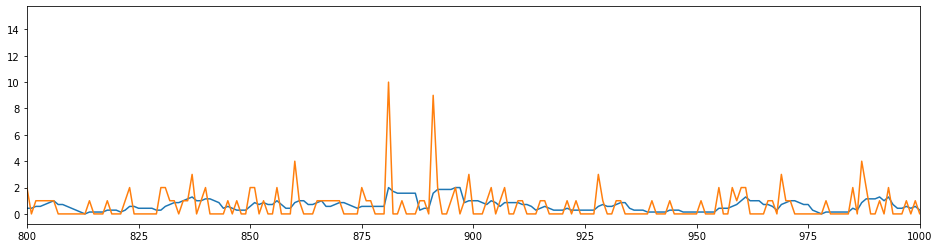

In [42]:
shift = 800
data.loc[(data.item_id == 0) & (data.store_id == 0), "sales"].rolling(7).mean().plot()
data.loc[(data.item_id == 0) & (data.store_id == 0), "sales"].plot()
plt.xlim((0 + shift, 200 + shift))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45942500 entries, 0 to 45942499
Data columns (total 15 columns):
 #   Column        Dtype  
---  ------        -----  
 0   item_id       int16  
 1   store_id      int8   
 2   d             int16  
 3   sales         int16  
 4   dollar_sales  float32
 5   wday          int8   
 6   month         int8   
 7   year          int16  
 8   event_name_1  int8   
 9   event_type_1  int8   
 10  event_name_2  int8   
 11  event_type_2  int8   
 12  snap_CA       int8   
 13  snap_TX       int8   
 14  snap_WI       int8   
dtypes: float32(1), int16(4), int8(10)
memory usage: 963.9 MB


In [24]:
data.loc[(data.item_id == 0) & (data.store_id == 0), "sales"]

ValueError: Invalid frequency: 7

In [11]:
data["event_name_1"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], dtype=int8)

In [13]:
data["event_type_1"].unique()

array([0, 1, 2, 3, 4], dtype=int8)

In [15]:
data["snap_CA"].unique()

array([0, 1], dtype=int8)

In [17]:
data["snap_TX"].unique()

array([0, 1], dtype=int8)